# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(len(lats))
print(len(lngs))

612
1500
1500


In [3]:
# create a data frame to hold all the data
df = pd.DataFrame({'City': cities})
df['Latitude'] = ""
df['Longitude'] = ""
df['Cloudiness'] = ""
df['Country'] = ""
df['Date'] = ""
df['Humidity'] = ""
df['Max Temp'] = ""
df['Wind Speed'] = ""

# display data frame
df.head()

,City,Latitude,Longitude,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,banjar,,,,,,,,
1,provideniya,,,,,,,,
2,mujiayingzi,,,,,,,,
3,imbituba,,,,,,,,
4,mataura,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}

In [5]:
# create for loop to loop through all the data and fill out the table
for index, row in df.iterrows():
    try:
        data = owm.get_current(row['City'], **settings)
        df.set_value(index, 'Latitude', data['coord']['lat'])
        df.set_value(index, 'Longitude', data['coord']['lon'])
        df.set_value(index, 'Cloudiness', data['clouds']['all'])
        df.set_value(index, 'Country', data['sys']['country'])
        df.set_value(index, 'Date', data['dt'])
        df.set_value(index, 'Humidity', data['main']['humidity'] )        
        df.set_value(index, 'Max Temp', data['main']['temp_max'])
        df.set_value(index, 'Wind Speed',  data['wind']['speed'])
        
        print(f"{index} Processed {row['City']}, {data['id']}")
    except Exception as e:
        print("City Not found: " + row['City'])

0 Processed banjar, 1650233
1 Processed provideniya, 4031574
2 Processed mujiayingzi, 2035707
3 Processed imbituba, 3461370
4 Processed mataura, 6201424
5 Processed punta arenas, 3874787
6 Processed vaini, 1273574
7 Processed sola, 3137942
8 Processed rikitea, 4030556
9 Processed jamestown, 2069194
City Not found: umzimvubu
11 Processed thompson, 6165406
12 Processed clyde river, 5924351
13 Processed havre-saint-pierre, 5972291
14 Processed barrow, 3833859
15 Processed rawson, 3839307
16 Processed tual, 1623197
17 Processed butaritari, 2110227
18 Processed ushuaia, 3833367
19 Processed hilo, 5855927
20 Processed georgetown, 3378644
City Not found: tsihombe
22 Processed yellowknife, 6185377
23 Processed minot, 5690532
24 Processed hobart, 2163355
25 Processed chokurdakh, 2126123
26 Processed albany, 5106834
27 Processed puerto leguizamo, 3671437
28 Processed cape town, 3369157
29 Processed mar del plata, 3863379
City Not found: safaga
City Not found: taolanaro
City Not found: asau
33 Pr

264 Processed mount gambier, 2156643
265 Processed noumea, 2139521
266 Processed camacupa, 3351014
267 Processed dikson, 1507390
268 Processed rozkishne, 705104
City Not found: sakakah
270 Processed nuuk, 3421319
271 Processed izhma, 554830
272 Processed dingle, 1714733
273 Processed chuy, 3443061
274 Processed padang, 1633419
275 Processed port blair, 1259385
276 Processed durban, 3016194
277 Processed fasa, 134721
278 Processed tromso, 3133895
279 Processed soyo, 2236967
280 Processed bubaque, 2374583
281 Processed tiksi, 2015306
City Not found: sentyabrskiy
283 Processed bealanana, 1068670
284 Processed hithadhoo, 1282256
285 Processed kavaratti, 1267390
286 Processed mahina, 2460755
287 Processed dunedin, 2191562
288 Processed galesong, 1644605
289 Processed crossfield, 5933070
290 Processed alice springs, 2077895
291 Processed buin, 3897774
292 Processed iskateley, 866062
293 Processed saurimo, 145531
294 Processed fengzhen, 2037391
295 Processed shymkent, 1518980
296 Processed ta

526 Processed ponta do sol, 3453439
527 Processed la asuncion, 3652350
City Not found: ituni
529 Processed vagay, 1487860
City Not found: envira
531 Processed karabulak, 1518542
532 Processed eydhafushi, 1337606
533 Processed westport, 2960970
534 Processed yar-sale, 1486321
City Not found: chiali
536 Processed teahupoo, 4033543
537 Processed yuzhnyy, 526543
538 Processed weiser, 5611730
539 Processed tocopilla, 3869716
540 Processed khorixas, 3356213
541 Processed port hawkesbury, 6111867
542 Processed dodge city, 5445298
543 Processed los llanos de aridane, 2514651
544 Processed klimovo, 547591
City Not found: bairiki
546 Processed bathsheba, 3374083
547 Processed hasaki, 2112802
548 Processed batemans bay, 2176639
549 Processed port hedland, 2063042
550 Processed ust-tsilma, 477940
551 Processed follonica, 6541106
552 Processed mayo, 6068416
553 Processed dawei, 1293625
554 Processed nanortalik, 3421765
555 Processed puerto narino, 3671387
556 Processed ayacucho, 3947019
557 Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# clean data, remove all missing cities
df_clean = df[df["Latitude"] != ""]
df_clean.head()

,City,Latitude,Longitude,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,banjar,-7.37,108.54,92,ID,1551860707,80,25.85,1.32
1,provideniya,64.42,-173.23,0,RU,1551860117,100,-6.35,3.67
2,mujiayingzi,42.12,118.78,0,CN,1551860707,64,-0.68,3.67
3,imbituba,-28.24,-48.67,40,BR,1551855600,88,26,2.6
4,mataura,-46.19,168.86,8,NZ,1551859804,56,20.56,2.68


In [7]:
# export to csv
output_data_file = df_clean.to_csv("Output/cities.csv",index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

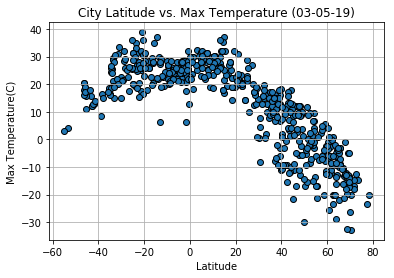

In [8]:
# plot scatter 
plt.scatter(df_clean['Latitude'], df_clean['Max Temp'], edgecolors = 'k')

# format
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs. Max Temperature (03-05-19)')
plt.grid()

# save figure
plt.savefig('Output/lat_vs_max_temp.png')

#### Latitude vs. Humidity Plot

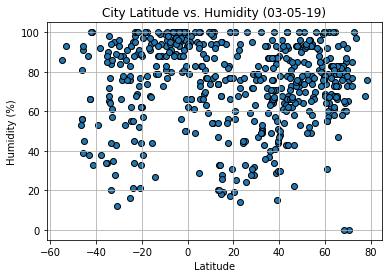

In [9]:
# plot scatter 
plt.scatter(df_clean['Latitude'], df_clean['Humidity'], edgecolors = 'k')

# format
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (03-05-19)')
plt.grid()

# save figure
plt.savefig('Output/lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

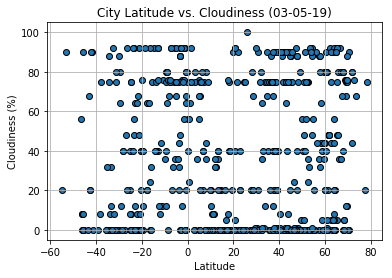

In [10]:
# plot scatter 
plt.scatter(df_clean['Latitude'], df_clean['Cloudiness'], edgecolors = 'k')

# format
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (03-05-19)')
plt.grid()

# save figure
plt.savefig('Output/lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

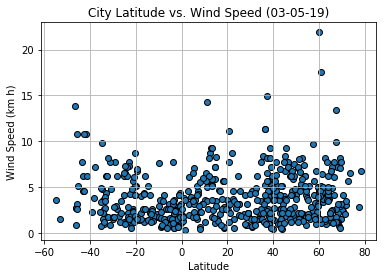

In [11]:
# plot scatter 
plt.scatter(df_clean['Latitude'], df_clean['Wind Speed'], edgecolors = 'k')

# format
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km h)')
plt.title('City Latitude vs. Wind Speed (03-05-19)')
plt.grid()

# save figure
plt.savefig('Output/lat_vs_wind_speed.png')